In [ ]:
#importing packages
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Data Loading
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip' , origin= _URL, extract= True)

68616192/68606236 [==============================] - 0s 0us/step


In [ ]:
#assign variables with the proper file path for the training and validation sets.
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered' )
train_dir = os.path.join(base_dir , 'train')
validation_dir = os.path.join(base_dir , 'validation')

In [ ]:
train_cats_dir = os.path.join( train_dir, 'cats')            #directory with our training cat pictures
train_dogs_dir = os.path.join( train_dir, 'dogs')            #directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir , 'cats')  #directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir , 'dogs')  #directory with our validation dog pictures

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))


total_train = num_cats_tr +num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:' , num_cats_tr)
print('total training dog images:', num_dogs_tr)

total training cat images: 1000
total training dog images: 1000


In [ ]:
print('total validation cat images:' , num_cats_val)
print('total validation dog images:', num_dogs_val)

total validation cat images: 500
total validation dog images: 500


In [ ]:
#how many cats and dogs images we have in our training and validation directory
print('Total training images:', total_train)
print('Total validation images:', total_val)

Total training images: 2000
Total validation images: 1000


In [ ]:
#Setting Model Parameters
BATCH_SIZE =100
IMG_SHAPE = 150 #training data consists of images with width of 150 pixels and height of 150 pixels

In [ ]:
#This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
  fig, axes =plt.subplots(1, 5, figsize=(20,20))
  axes= axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


In [ ]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size= BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE, IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


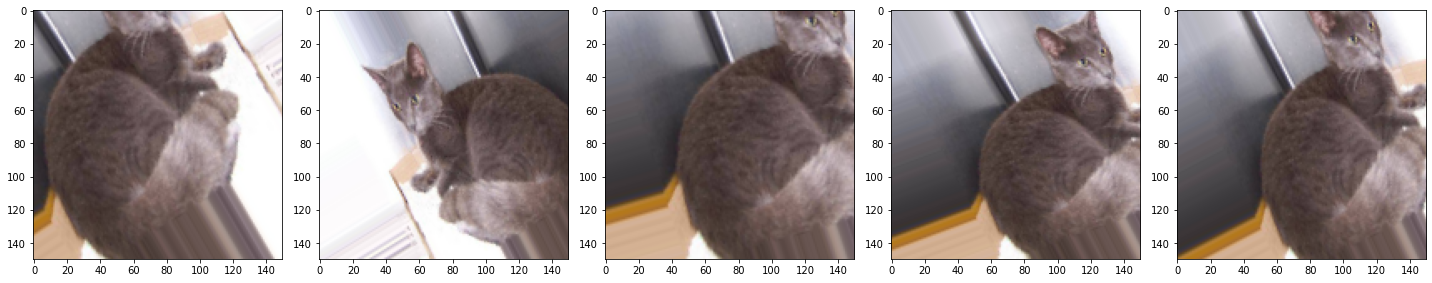

In [ ]:
#visualize how a single image would look like five different times, when we pass these augmentations randomly to our dataset
augmented_images= [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
#Creating Validation Data generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen= image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                directory= validation_dir,
                                                target_size=(IMG_SHAPE, IMG_SHAPE),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
#create the model
def build_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])
  return model

In [ ]:
#compile the model
model = build_model()
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

In [ ]:
model.summary() #summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Train the model
epochs=100

history=model.fit_generator(
        train_data_gen,
        steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
20/20 [==============================] - 17s 846ms/step - loss: 0.6784 - accuracy: 0.5695 - val_loss: 0.6532 - val_accuracy: 0.6040
Epoch 2/100
20/20 [==============================] - 18s 894ms/step - loss: 0.6613 - accuracy: 0.5940 - val_loss: 0.6316 - val_accuracy: 0.6340
Epoch 3/100
20/20 [==============================] - 17s 845ms/step - loss: 0.6460 - accuracy: 0.6080 - val_loss: 0.6074 - val_accuracy: 0.6670
Epoch 4/100
20/20 [==============================] - 17s 851ms/step - loss: 0.6426 - accuracy: 0.6260 - val_loss: 0.6021 - val_accuracy: 0.6840
Epoch 5/100
20/20 [==============================] - 17s 845ms/step - loss: 0.6193 - accuracy: 0.6525 - val_loss: 0.6025 - val_accuracy: 0.6690
Epoch 6/100
20/20 [==============================] - 17s 850ms/step - loss: 0.6295 - accuracy: 0.6510 - val_loss: 0.5788 - val_accuracy: 0.7010
Epoch 7/100
20/20 [==============================] - 17s 847ms/step - loss: 0.6029 - accuracy: 0.6710 - val_loss: 0.5677 - val_accuracy:

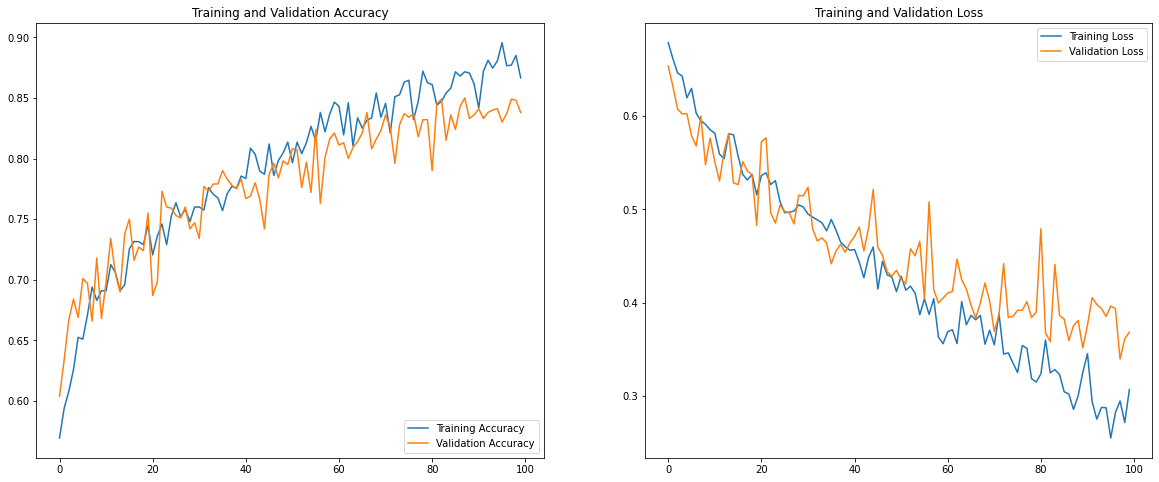

In [ ]:
#Visualize the results and plot the accuracies and losses of the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
